In [1]:
# Import pandas if not already imported
import pandas as pd

# Load datasets
matches_df = pd.read_csv('D:/Datset/WorldCupMatches.csv')
players_df = pd.read_csv('D:/Datset/WorldCupPlayers.csv')

# Filter rows in players_df for goals scored (assuming 'G' in 'Event' indicates a goal)
goal_events = players_df[players_df['Event'].str.contains('G', na=False)]

# Count the number of goals scored by players from each team
top_team_goals = goal_events['Team Initials'].value_counts().head(10)

print("Top Teams by Player Goals Scored:\n", top_team_goals)


Top Teams by Player Goals Scored:
 Team Initials
BRA    176
FRG    103
ITA    100
ARG     98
GER     80
FRA     79
NED     72
ESP     65
URU     62
SWE     59
Name: count, dtype: int64


In [2]:
# Calculate the winning team for each match in matches_df
matches_df['Winning Team'] = matches_df.apply(
    lambda row: row['Home Team Name'] if row['Home Team Goals'] > row['Away Team Goals']
    else row['Away Team Name'] if row['Away Team Goals'] > row['Home Team Goals']
    else 'Draw', axis=1
)

# Count the wins for each team across all matches
team_wins = matches_df[matches_df['Winning Team'] != 'Draw']['Winning Team'].value_counts()

print("Top Teams by Match Wins:\n", team_wins.head(10))


Top Teams by Match Wins:
 Winning Team
Brazil         71
Italy          45
Argentina      44
Germany FR     36
Germany        34
France         29
Netherlands    29
Spain          29
England        26
Uruguay        20
Name: count, dtype: int64


In [3]:
# Total goals scored in each match
matches_df['Total Goals'] = matches_df['Home Team Goals'] + matches_df['Away Team Goals']
avg_goals_per_match = matches_df['Total Goals'].mean()

# Average attendance per match
avg_attendance = matches_df['Attendance'].mean()

print(f"Average Goals per Match: {avg_goals_per_match}")
print(f"Average Attendance per Match: {avg_attendance}")

Average Goals per Match: 2.8333333333333335
Average Attendance per Match: 45164.8


In [4]:
# Load the World Cups data
world_cups_df = pd.read_csv('D:/Datset/WorldCups.csv')

# Display the first few rows to understand its structure
print(world_cups_df.head())

   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607  


In [5]:
# Count of World Cup wins by each country
top_winners = world_cups_df['Winner'].value_counts()
print("Top Teams by World Cup Wins:\n", top_winners)

Top Teams by World Cup Wins:
 Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: count, dtype: int64


Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object


<Axes: title={'center': 'World Cup Attendance Over Time'}, xlabel='Year'>

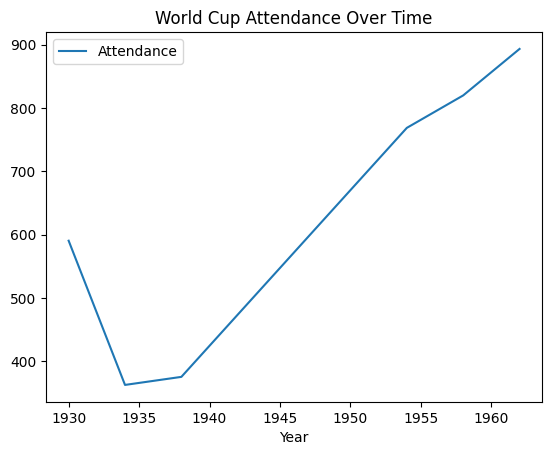

In [7]:
# Check the data types of the columns
print(world_cups_df.dtypes)
# Convert Year and Attendance to numeric types if necessary
world_cups_df['Year'] = pd.to_numeric(world_cups_df['Year'], errors='coerce')
world_cups_df['Attendance'] = pd.to_numeric(world_cups_df['Attendance'], errors='coerce')
# Drop rows with NaN values in Year or Attendance
world_cups_df.dropna(subset=['Year', 'Attendance'], inplace=True)
world_cups_df.plot(x='Year', y='Attendance', kind='line', title='World Cup Attendance Over Time')